In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import IFrame
import warnings

# Capítulo 1: Límites

Consideremos un intervalo abierto $I = (a,b)$, un punto $c \in \mathbb{R}$ y una función $f : I \backslash \{ c \} \longrightarrow \mathbb{R}$. Aunque $f$ no este definida en $c$ (pues $c$ no existe como preimagen de la función $f$ ya que no esta definida en su dominio, por lo tanto no existe la imagen $f(c)$), si se analiza el comportamiento de $f(x)$ para puntos $x \in I \backslash \{ c \}$ muy próximos a $c$, es posible que dichas imágenes se aproximen a un valor $L \in \mathbb{R}$

#### Ejemplo 1.1
Estudiemos la siguiente función $f: (0,2) \backslash \{ 1 \} \longrightarrow \mathbb{R}$, definida por $f(x) = \dfrac{x^2 -1}{x-1}$. A la izqueirda la tabla muestra algunas aproximaciones de la imagen $f(x)$ cuando $x$ es cercano a $1$, punto donde la función no esta definida. A la derecha se muestra la gráfica de la función.

/var/folders/4w/js2qgjy52hqch0g1cczbv_sc0000gn/T/ipykernel_17851/644362722.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: f"{x:.3f}")


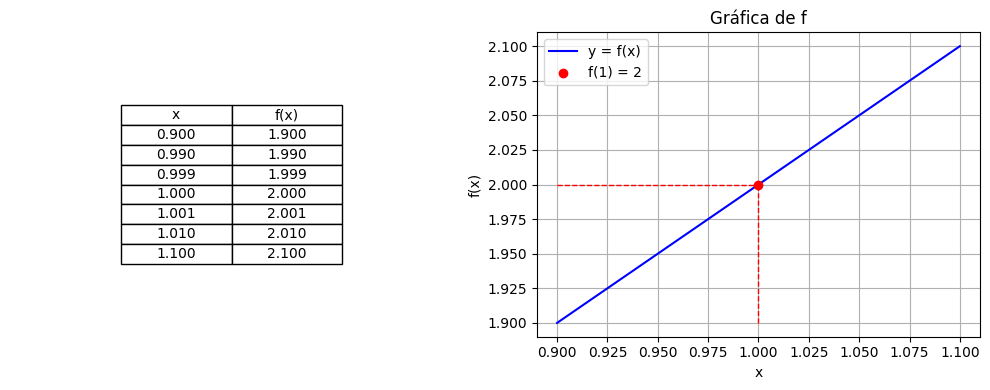

In [2]:
def f(x):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        return np.where(x == 1, 2, (x**2 - 1)/(x - 1))

x = [0.900, 0.990, 0.999, 1.000, 1.001, 1.010, 1.100]
y = f(np.array(x))
df = pd.DataFrame({'x': x, 'f(x)': y})
df = df.applymap(lambda x: f"{x:.3f}")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# ======== Tabla ========
axes[0].axis('off')
axes[0].axis('tight')
tabla = axes[0].table(cellText=df.values,
                      colLabels=df.columns,
                      cellLoc='center',
                      loc='center')
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(0.5, 1.2)
# ======== Gráfica ========
axes[1].plot(x, y, color='blue', label='y = f(x)')
axes[1].scatter([1], [2], color='red', zorder=5, label='f(1) = 2')
axes[1].plot([1, 1], [min(y), 2], color='red', linestyle='--', linewidth=1)
axes[1].plot([min(x), 1], [2, 2], color='red', linestyle='--', linewidth=1)
axes[1].set_title('Gráfica de f')
axes[1].set_xlabel('x')
axes[1].set_ylabel('f(x)')
axes[1].grid()
axes[1].legend()

plt.tight_layout()
plt.show()

Podemos observar que cuando el valor de $x$ tiende a $1$, dicha función se aproxima al valor límite $L=2$. Esta notación (de límite) se representa como:
$$ \lim_{x \rightarrow 1}{f(x)} = 2 $$

#### Definición 1.1. (de Límite)
Sea un intervalo abierto y acotado $I=(a,b)$, un punto $c \in I$, una función $f : I \backslash \{ c \} \longrightarrow \mathbb{R}$ y $L \in \mathbb{R}$. Se dice que $\displaystyle{\lim_{x \rightarrow c}{f(x)} = L}$ si y sólo si
$$ (\forall \varepsilon > 0)(\exists \delta > 0)(\forall x \in I) \quad 0 < | x-c | < \delta \Longrightarrow | f(x) - L | < \varepsilon $$

Es importante precisar que, de acuerdo a esta definición, el valor de $\delta$ depende del valor de $\varepsilon$. Es por ello que, en ocaciones, se denota $\delta = \delta (\varepsilon)$ señalando la dependencia funcional entre $\delta$ y $\varepsilon$. Por otra parte, la desigualdad $0 < |x - c |$ explicita que la función podría no estar definida en $c$ (dado que la desigualdad no se cumple cuando $x = c$). Incluso, si la función estuviese bien definida en $c$, existen muchos casos en los que $\displaystyle{\lim_{x \rightarrow c}{f(x)} = f(c)}$.

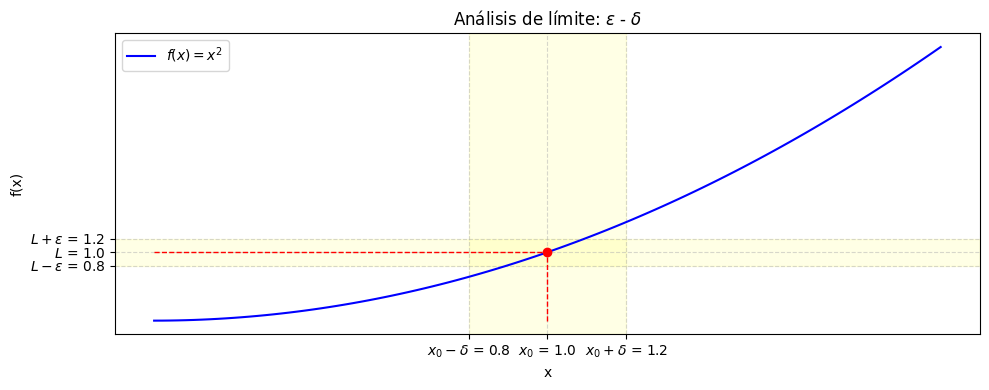

In [3]:
def f(x):
    return x**2

x0 = 1.0
L = f(x0) 
epsilon = 0.2
delta = 0.2

x = np.linspace(0, 2, 100)
y = f(x)

plt.figure(figsize=(10, 4))
plt.plot(x, y, color='blue', label='$f(x) = x^2$')

plt.xticks([x0 - delta, x0, x0 + delta], 
           [f'$x_0 - \\delta$ = {x0 - delta:.1f}', 
            f'$x_0$ = {x0:.1f}',
            f'$x_0 + \\delta$ = {x0 + delta:.1f}'])

plt.yticks([L - epsilon, L, L + epsilon],
           [f'$L - \\varepsilon$ = {L - epsilon:.1f}',
            f'$L$ = {L:.1f}',
            f'$L + \\varepsilon$ = {L + epsilon:.1f}'])

plt.plot([1, 1], [min(y), 1], color='red', linestyle='--', linewidth=1)
plt.plot([min(x), 1], [1, 1], color='red', linestyle='--', linewidth=1)
plt.scatter([x0], [L], color='red', zorder=5)

plt.axvspan(x0 - delta, x0 + delta, color='yellow', alpha=0.1)
plt.axhspan(L - epsilon, L + epsilon, color='yellow', alpha=0.1)

plt.title('Análisis de límite: $\\varepsilon$ - $\\delta$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

#### Teorema 1.1. (Álgebra de Límites)
Sean $n \in \mathbb{N}$, $f$ y $g$ funciones tales que $\displaystyle{\lim_{x \rightarrow c}{f(x)} = L_1}$, y $\displaystyle{\lim_{x \rightarrow c}{g(x)} = L_2}$, entonces:

1. $\displaystyle{\lim_{x \rightarrow c}{k} = k}$, $\forall k \in \mathbb{R}$
2. $\displaystyle{\lim_{x \rightarrow c}{x} = c}$
3. $\displaystyle{\lim_{x \rightarrow c}{[f(x)+g(x)]} = \lim_{x \rightarrow c}{f(x)} + \lim_{x \rightarrow c}{g(x)} = L_1 + L_2 }$
4. $\displaystyle{\lim_{x \rightarrow c}{[k \cdot f (x)]} = k \cdot  \lim_{x \rightarrow c}{f(x)} = k \cdot  L_1}$
5. $\displaystyle{\lim_{x \rightarrow c}{[f(x) \cdot g(x)]} = \lim_{x \rightarrow c}{f(x)} \cdot \lim_{x \rightarrow c}{g(x)} = L_1 \cdot L_2 }$
6. $\displaystyle{\lim_{x \rightarrow c}{\left[ \frac{f(x)}{g(x)} \right]} = \dfrac{\displaystyle{\lim_{x \rightarrow c}{f(x)}}}{\displaystyle{\lim_{x \rightarrow c}{g(x)}}} = \frac{L_1}{L_2} }$, con $L_2 \neq 0$
7. $\displaystyle{\lim_{x \rightarrow c}{[f (x)]^{n}} = \left[ \lim_{x \rightarrow c}{f(x)} \right]^n = (L_1)^n}$


#### Ejemplo 1.2

In [4]:
IFrame(src="p.pdf#page=1", width=800, height=600)  

#### Ejemplo 1.3
Para la función $f(x) = \sin{\left(\dfrac{1}{x}\right)}$, definida para $x \neq 0$, estudie el límite
$$ \lim_{x \rightarrow 0}{\sin{\left( \frac{1}{x} \right)}} $$
Para esto:
1. Construya una table de valores para $f$ considerando al menos 50 valores para $x$, con $0 < x < 0.1$.
2. Considere la sucesión $x_n = \dfrac{1}{n \pi}$. Calcule $\displaystyle{\lim_{n \rightarrow \infty}{x_n}}$ y $\displaystyle{\lim_{n \rightarrow \infty}{f(x_n)}}$.
3. Considere la sucesión $y_n = \dfrac{1}{\pi/2 + 2 n \pi}$. Calcule $\displaystyle{\lim_{n \rightarrow \infty}{y_n}}$ y $\displaystyle{\lim_{n \rightarrow \infty}{f(y_n)}}$.
4. Es posible que $\displaystyle{\lim_{x \rightarrow 0}{\sin{\left( \frac{1}{x} \right)}}} = L$, para algún $L \in \mathbb{R}$.
5. Grafique la función $f$ para $-1/2 < x < 1/2$

In [5]:
def f(x):
    return np.sin(1/x)

x = np.linspace(0, 0.1 ,51)
y = f(np.array(x))
f_df = pd.DataFrame({'x': x, 'f(x)': y})
f_df

/var/folders/4w/js2qgjy52hqch0g1cczbv_sc0000gn/T/ipykernel_17851/3828301438.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sin(1/x)
/var/folders/4w/js2qgjy52hqch0g1cczbv_sc0000gn/T/ipykernel_17851/3828301438.py:2: RuntimeWarning: invalid value encountered in sin
  return np.sin(1/x)


,x,f(x)
0,0.000,NaN
1,0.002,-0.467772
2,0.004,-0.970528
3,0.006,-0.161545
4,0.008,-0.616040
5,0.010,-0.506366
6,0.012,0.996711
7,0.014,0.736620
8,0.016,-0.325796
9,0.018,-0.837730


In [6]:

xn = []
yn = []
for i in range(1, 51):
    xn.append(1/(i*np.pi))
    yn.append(1/(np.pi/2 +2*i*np.pi))

fxn = f(np.array(xn))
fxn = np.where(np.abs(yn) < 1e-6, 0, yn)

fyn = f(np.array(yn))

df = pd.DataFrame({'x_n': xn, 'f(x_n)': fxn, 'y_n': yn, 'f(y_n)': fyn})
df.tail(10)


,x_n,f(x_n),y_n,f(y_n)
40,0.007764,0.003858,0.003858,1.0
41,0.007579,0.003767,0.003767,1.0
42,0.007403,0.003680,0.003680,1.0
43,0.007234,0.003597,0.003597,1.0
44,0.007074,0.003517,0.003517,1.0
45,0.006920,0.003441,0.003441,1.0
46,0.006773,0.003368,0.003368,1.0
47,0.006631,0.003299,0.003299,1.0
48,0.006496,0.003232,0.003232,1.0
49,0.006366,0.003167,0.003167,1.0


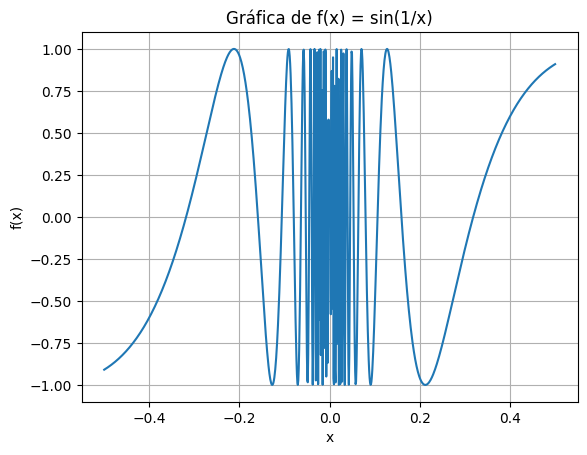

In [7]:
x = np.linspace(-1/2, 1/2, 1000)
y = f(x)

plt.plot(x, y)
plt.title('Gráfica de f(x) = sin(1/x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

In [ ]:
!jupyter nbconvert --to html --no-input Clase_1.ipynb --output-dir=./docs

[NbConvertApp] Converting notebook Clase_1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 433649 bytes to Clase_1.html
[NbConvertApp] Converting notebook Clase_1.ipynb to pdf
[NbConvertApp] ERROR | Error while converting 'Clase_1.ipynb'
Traceback (most recent call last):
  File "/opt/miniconda3/lib/python3.13/site-packages/nbconvert/nbconvertapp.py", line 487, in export_single_notebook
    output, resources = self.exporter.from_filename(
                        ~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        notebook_filename, resources=resources
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/opt/miniconda3/lib/python3.13/site-packages/nbconvert/exporters/templateexporter.py", line 390, in from_filename
    return super().from_filename(filename, resources, **kw)  # type:ignore[return-value]
           ~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/lib/python3.13/site-packages/nbconvert/exporte